In [2]:
import pandas as pd

Data Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

[Patricio, 2018] Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

In [3]:
# Load the data
health = pd.read_csv("dataR2.csv")
health.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
# Split independent and dependent variables
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

# Fit the model
lr.fit(X,y)

# Print the accuracy of the model
print(lr.score(X,y))

0.8017241379310345


## Sequential Forward Selection

In [11]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Sequential forward selection
sfs = SFS(lr, k_features = 5, forward = True, floating = False, scoring = 'accuracy', cv = 0)
# Fit the equential forward selection model
sfs.fit(X,y)

# Print the chosen features
print(sfs.subsets_[3]['feature_names'])

# Print the accuracy of the model after sequential forward selection
print(sfs.subsets_[5]['avg_score'])


('Age', 'Glucose', 'Insulin')
0.7586206896551724


/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


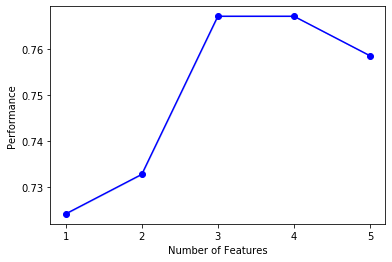

In [12]:
# Plot the model accuracy
plot_sfs(sfs.get_metric_dict())
plt.show()

## Sequential Backward Selection

In [14]:
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit sbs to X and y
sbs.fit(X,y)

sbs.subsets_

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Adiponectin',
   'Resistin',
   'MCP.1')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Adiponectin',
   'Resistin')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Resistin')},
 6: {'feature_idx': (0, 1, 2, 3, 5, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')},
 5: {'feature_idx': (0, 1, 2, 3, 7),
  'cv_scores': array([0.79310345]),
  'avg_score': 0.79

/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


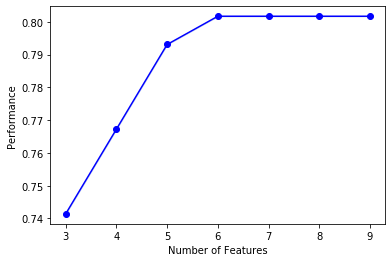

In [15]:
# Plot the accuracy of the model as a function of the number of features
plot_sfs(sbs.get_metric_dict())
plt.show()

## Sequential Floating Forward Selection

In [16]:
sffs = SFS(lr,
          k_features=3,
          forward= True,
          floating= True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)

# Print a tuple with the names of the features chosen by sequential forward floating selection.
print(sffs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Insulin')


## Sequential Floating Backward Selection

In [17]:
sbfs = SFS(lr,
          k_features=3,
          forward= False,
          floating= True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)

# Print a tuple with the names of the features chosen by sequential backward floating selection.
print(sbfs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Resistin')


## Recursive Feature Elimination

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Create a list of feature names
feature_list = list(X.columns)

# Standardize the data
X = StandardScaler().fit_transform(X)

In [27]:
# Recursive feature elimination
rfe = RFE(lr, n_features_to_select=3)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [28]:
# List of features chosen by recursive feature elimination
rfe_features = [f for (f,support) in zip(feature_list, rfe.support_) if support]
rfe_features

['BMI', 'Glucose', 'Resistin']

In [29]:
print(rfe.score(X,y))

0.7327586206896551
